# Convex circumference
#### 2D

In [153]:
# imports

import random
import matplotlib.pyplot as plt
import math
import numpy as np


In [154]:
# generate random coordinates

def generateCoordinates(x_min : int, y_min : int, x_max : int, y_max : int, n : int) -> list[int]:
    plane : list[int] = [(random.randint(x_min,x_max+1),random.randint(y_min,y_max+1)) for _ in range(n)]
    return plane

In [155]:
def display_coordinates(coordinates):
    x = [coord[0] for coord in coordinates]
    y = [coord[1] for coord in coordinates]
    
    plt.scatter(x[0], y[0], color='red')  
    plt.scatter(x[1:], y[1:])  
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Coordinates')
    plt.show()

def display_coordinates_WithLines(coordinates):
    x = [coord[0] for coord in coordinates]
    y = [coord[1] for coord in coordinates]
    
    plt.scatter(x[0], y[0], color='red')  
    plt.scatter(x[1:], y[1:])  
    
    for i in range(1, len(coordinates)):
        plt.plot([x[0], x[i]], [y[0], y[i]], color='black')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Coordinates')
    plt.show()

def plot_points_and_line(points1, points2):
    x1, y1 = zip(*points1)
    x2, y2 = zip(*points2)

    plt.scatter(x1[0], y2[0], color='red')
    plt.scatter(x1[1:], y1[1:])
    plt.plot(x2, y2, color='red')

    plt.show()




In [156]:
def sortByAngle(p):
    points = sorted(p, key=lambda x: (x[1],x[0]))
    print(points)
    display_coordinates(points)

    start = points[0]
    sortedByAngle = sorted(points, key = lambda point : math.atan2(point[1]-start[1], point[0]-start[0]))
    print(sortedByAngle)
    display_coordinates_WithLines(sortedByAngle)
    return points, sortedByAngle


In [157]:
def walkAround(points):
    npPoints = [np.array(x) for x in points]
    circumference = []
    for point in npPoints:
        while len(circumference) >= 2 and np.cross(circumference[-1] - circumference[-2], point - circumference[-1]) < 0:
            circumference.pop()
        circumference.append(point)
    circumference.append(points[0])
    print(circumference)
    return circumference

[(-227, -500), (-225, -500), (224, -500), (487, -500), (-496, -499), (-494, -499), (-48, -499), (-500, -498), (-486, -498), (-333, -498), (-31, -498), (-434, -496), (-28, -495), (494, -495), (-425, -493), (-337, -493), (-305, -493), (-187, -493), (-78, -493), (-44, -493), (-35, -493), (257, -493), (316, -493), (173, -490), (318, -490), (349, -489), (436, -489), (-321, -486), (-93, -486), (-51, -486), (330, -486), (297, -485), (-389, -484), (-322, -483), (-221, -483), (204, -483), (250, -483), (320, -482), (407, -482), (-313, -481), (359, -481), (-386, -480), (-353, -480), (-222, -480), (-16, -480), (315, -480), (-102, -479), (105, -479), (500, -479), (-131, -478), (-102, -478), (-419, -476), (-92, -476), (215, -476), (242, -476), (324, -476), (426, -476), (-91, -474), (410, -474), (390, -473), (-167, -472), (164, -472), (389, -472), (11, -471), (329, -470), (-9, -469), (-177, -468), (-115, -468), (102, -468), (-264, -467), (-46, -467), (-174, -466), (415, -465), (-233, -464), (8, -462)

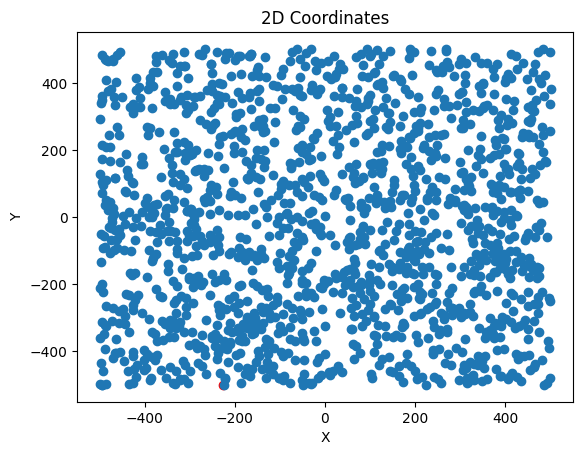

[(-227, -500), (-225, -500), (224, -500), (487, -500), (-48, -499), (494, -495), (-31, -498), (316, -493), (257, -493), (436, -489), (318, -490), (349, -489), (173, -490), (-28, -495), (330, -486), (407, -482), (297, -485), (500, -479), (359, -481), (320, -482), (250, -483), (-35, -493), (426, -476), (315, -480), (-44, -493), (204, -483), (410, -474), (324, -476), (390, -473), (389, -472), (-78, -493), (242, -476), (329, -470), (215, -476), (415, -465), (105, -479), (455, -455), (164, -472), (379, -454), (464, -446), (-51, -486), (307, -457), (353, -451), (467, -439), (314, -450), (-16, -480), (102, -468), (199, -458), (482, -427), (151, -461), (-93, -486), (340, -440), (144, -460), (331, -439), (309, -440), (279, -442), (429, -424), (323, -433), (11, -471), (349, -429), (442, -414), (434, -415), (453, -410), (267, -434), (192, -443), (-9, -469), (424, -407), (38, -462), (164, -443), (355, -415), (339, -414), (498, -389), (180, -436), (8, -462), (19, -459), (121, -442), (-102, -479), (

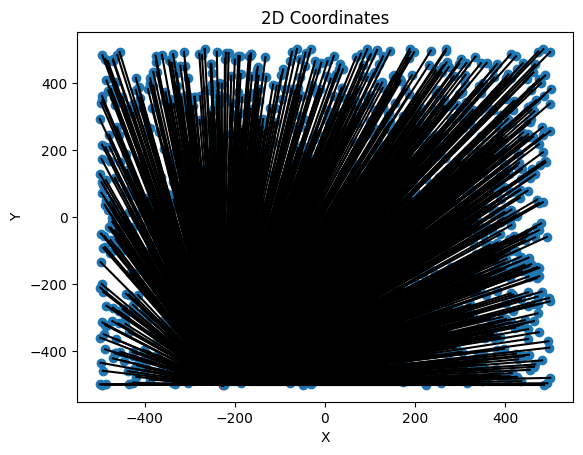

[array([-227, -500]), array([-225, -500]), array([ 224, -500]), array([ 487, -500]), array([ 494, -495]), array([ 500, -479]), array([501, 382]), array([500, 492]), array([485, 500]), array([269, 501]), array([188, 501]), array([-32, 501]), array([-62, 501]), array([-267,  501]), array([-456,  492]), array([-494,  482]), array([-500,  293]), array([-500,  129]), array([-500, -498]), array([-496, -499]), (-227, -500)]


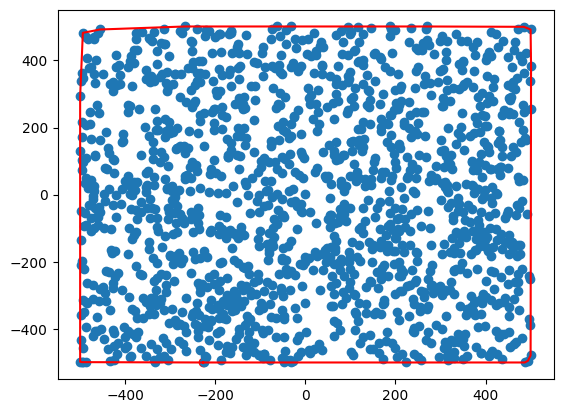

In [164]:
initialPoints = generateCoordinates(-500, -500, 500, 500, 1500)
initialPoints, sortedPoints = sortByAngle(initialPoints)
boundary = walkAround(sortedPoints)
plot_points_and_line(initialPoints, boundary)